In [1]:
from LabData.DataLoaders.BodyMeasuresLoader import BodyMeasuresLoader
from LabData.DataLoaders.ItamarSleepLoader import ItamarSleepLoader
from LabData.DataLoaders.BloodTestsLoader import BloodTestsLoader
from LabData.DataLoaders.DEXALoader import DEXALoader
from LabData.DataLoaders.UltrasoundLoader import UltrasoundLoader
from LabData.DataLoaders.GutMBLoader import GutMBLoader
from LabData.DataLoaders.SubjectLoader import SubjectLoader
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pickle

plt.style.use('default')              
sns.set_theme(style='whitegrid')      

Process dexa, ultrasound and sleep phenotypes

In [2]:
dexa = DEXALoader().get_data(study_ids=10)
ultrasound = UltrasoundLoader().get_data(study_ids=10)
sleep = ItamarSleepLoader().get_data(study_ids=10)

[]


In [3]:
dexa_df = dexa.df.reset_index()
dexa_df_meta = dexa.df_metadata.reset_index()

ultrasound_df = ultrasound.df.reset_index()
ultrasound_df_meta = ultrasound.df_metadata.reset_index()

sleep_df = sleep.df.reset_index()
sleep_df_meta = sleep.df_metadata.reset_index()

In [4]:
ultrasound = pd.merge(ultrasound_df, ultrasound_df_meta, on=['RegistrationCode', 'Date'], how='outer')
ultrasound_baseline = ultrasound[ultrasound['research_stage'] == 'baseline']
ultrasound_baseline = ultrasound_baseline.drop_duplicates(subset='RegistrationCode', keep='first')
ultrasound_baseline

dexa = pd.merge(dexa_df, dexa_df_meta, on=['RegistrationCode', 'Date'], how='outer')
dexa_baseline = dexa[dexa['research_stage'] == 'baseline']
dexa_baseline = dexa_baseline.drop_duplicates(subset='RegistrationCode', keep='first')
dexa_baseline

sleep = pd.merge(sleep_df, sleep_df_meta, on=['RegistrationCode', 'Date'], how='outer')
sleep_baseline = sleep[sleep['research_stage'] == 'baseline']
# Average features for all 3 nights

sleep_baseline = sleep_baseline.groupby('RegistrationCode', as_index=False).agg({
    'age': 'first',         
    'gender': 'first',      
    'AHI': 'mean',
    'ODI': 'mean',
    'RDI': 'mean'
})
sleep_baseline = sleep_baseline.drop_duplicates(subset='RegistrationCode', keep='first')
sleep_baseline

,RegistrationCode,age,gender,AHI,ODI,RDI
0,10K_1000942861,54.0,1.0,17.575000,6.870000,25.930000
1,10K_1001201093,21.0,0.0,0.930000,0.183333,11.483333
2,10K_1002033709,43.0,0.0,3.696000,1.110000,14.128000
3,10K_1002254441,45.0,1.0,5.503333,2.330000,10.346667
4,10K_1003113258,49.0,1.0,1.920000,0.520000,6.820000
...,...,...,...,...,...,...
6801,10K_9994795317,47.0,1.0,15.116667,10.683333,19.480000
6802,10K_9995623290,54.0,1.0,5.113333,2.566667,12.683333
6803,10K_9995823183,47.0,1.0,4.516667,0.370000,23.946667
6804,10K_9996884777,53.0,0.0,NaN,NaN,NaN


Process body measurements

In [5]:
bm = BodyMeasuresLoader().get_data(study_ids=10)
bm_df = bm.df.reset_index()
bm_df_meta = bm.df_metadata.reset_index()

In [6]:
bm_df

,RegistrationCode,Date,lying_blood_pressure_diastolic,abdominal,lying_blood_pressure_systolic,dominant_hand,weight,lying_blood_pressure_pulse_rate,bmr,standing_three_min_blood_pressure_diastolic,...,body_temperature,hand_grip_right,bmi,waist,hips,standing_one_min_blood_pressure_diastolic,height,is_getting_period,body_fat,whr
0,10K_1000942861,2021-12-13 07:09:38.954985,87.0,NaN,139.0,Right,91.800003,50.0,NaN,90.0,...,NaN,128.500000,28.176579,99.0,107.000000,93.0,180.500000,NaN,NaN,0.925234
1,10K_1001201093,2021-08-26 07:39:21.411519,69.0,NaN,100.0,Right,59.400002,66.0,NaN,74.0,...,NaN,65.000000,20.553633,76.0,97.000000,73.0,170.000000,NaN,NaN,0.783505
2,10K_1001201093,2023-09-12 10:23:05.534125,NaN,NaN,NaN,Right,58.799999,NaN,NaN,NaN,...,NaN,64.000000,20.833334,70.0,96.000000,NaN,168.000000,NaN,NaN,0.729167
3,10K_1002033709,2022-08-03 07:20:01.044769,72.0,NaN,106.0,Right,55.000000,60.0,NaN,78.0,...,NaN,56.000000,21.755468,80.0,91.000000,75.0,159.000000,NaN,NaN,0.879121
4,10K_1002087123,2019-12-04 11:53:40.350115,89.0,NaN,128.0,Right,105.699997,72.0,1805.0,92.0,...,36.9,62.200001,36.660603,113.0,119.000000,119.0,169.800003,Yes,45.099998,0.949580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21987,10K_9998635752,2024-04-08 06:49:26.293372,NaN,NaN,NaN,Right,67.000000,NaN,NaN,NaN,...,NaN,111.900002,22.386314,81.0,94.199997,NaN,173.000000,NaN,NaN,0.859873
21988,10K_9999226141,2020-01-21 08:54:23.012570,81.0,NaN,133.0,Right,78.900002,61.0,1894.0,98.0,...,36.9,130.199997,24.624701,87.0,99.000000,96.0,179.000000,NaN,16.700001,0.878788
21989,10K_9999226141,2022-10-03 10:35:41.162233,91.0,NaN,143.0,Right,76.000000,75.0,NaN,103.0,...,NaN,122.500000,23.986870,87.0,98.000000,103.0,178.000000,NaN,NaN,0.887755
21990,10K_9999226141,2024-01-14 11:39:01.990983,NaN,NaN,NaN,Right,74.199997,NaN,NaN,NaN,...,NaN,129.000000,23.684126,79.0,93.000000,NaN,177.000000,NaN,NaN,0.849462


In [7]:
bm_df_meta

,RegistrationCode,Date,second_hand_grip_left,blood_pressure_letter_to_physician,second_hand_grip_right,city,source_created_at,country,sitting_another_hand_blood_pressure_systolic,age,...,sitting_another_hand_blood_pressure_diastolic,StudyTypeID4,StudyTypeID6,gender,yob,StudyTypeID7,StudyTypeID8,StudyTypeID5,sitting_another_hand_blood_pressure_pulse_rate,us_state
0,10K_1000942861,2021-12-13 07:09:38.954985,NaN,NaN,NaN,רחובות,2021-12-13 07:09:38.954985+00:00,IL,NaN,54.0,...,NaN,NaN,NaN,1.0,1967.0,NaN,NaN,NaN,NaN,None
1,10K_1001201093,2021-08-26 07:39:21.411519,NaN,NaN,NaN,ראשון לציון,2021-08-26 07:39:21.411519+00:00,IL,NaN,42.0,...,NaN,NaN,NaN,0.0,1979.0,NaN,NaN,NaN,NaN,None
2,10K_1001201093,2023-09-12 10:23:05.534125,65.0,Not Given,75.0,ראשון לציון,2023-09-12 10:23:05.534125+00:00,IL,108.0,44.0,...,56.0,NaN,NaN,0.0,1979.0,NaN,NaN,NaN,73.0,None
3,10K_1002033709,2022-08-03 07:20:01.044769,NaN,Not Given,NaN,תל אביב-יפו,2022-08-03 07:20:01.044769+00:00,IL,NaN,43.0,...,NaN,NaN,NaN,0.0,1979.0,NaN,NaN,NaN,NaN,None
4,10K_1002087123,2019-12-04 11:53:40.350115,NaN,NaN,NaN,תל אביב-יפו,2019-12-04 11:53:40.350115+00:00,IL,NaN,42.0,...,NaN,NaN,NaN,0.0,1977.0,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21987,10K_9998635752,2024-04-08 06:49:26.293372,99.4,Not Given,113.9,None,2024-04-08 06:49:26.293372+00:00,IL,114.0,60.0,...,63.0,NaN,NaN,1.0,1964.0,NaN,NaN,NaN,54.0,None
21988,10K_9999226141,2020-01-21 08:54:23.012570,NaN,NaN,NaN,בני ראם,2020-01-21 08:54:23.012570+00:00,IL,NaN,42.0,...,NaN,NaN,NaN,1.0,1978.0,NaN,NaN,NaN,NaN,None
21989,10K_9999226141,2022-10-03 10:35:41.162233,NaN,Not Given,NaN,בני ראם,2022-10-03 10:35:41.162233+00:00,IL,NaN,44.0,...,NaN,NaN,NaN,1.0,1978.0,NaN,NaN,NaN,NaN,None
21990,10K_9999226141,2024-01-14 11:39:01.990983,118.0,Not Given,131.0,בני ראם,2024-01-14 11:39:01.990983+00:00,IL,126.0,46.0,...,70.0,NaN,NaN,1.0,1978.0,NaN,NaN,NaN,61.0,None


In [8]:
bm = pd.merge(bm_df, bm_df_meta, on=['RegistrationCode', 'Date'], how='outer')
bm['waist_height_ratio'] = bm['waist'] / bm['height']
bm = bm.rename(columns={'whr': 'waist_hips_ratio'})
bm_baseline = bm[bm['research_stage'] == 'baseline']
bm_baseline

,RegistrationCode,Date,lying_blood_pressure_diastolic,abdominal,lying_blood_pressure_systolic,dominant_hand,weight,lying_blood_pressure_pulse_rate,bmr,standing_three_min_blood_pressure_diastolic,...,StudyTypeID4,StudyTypeID6,gender,yob,StudyTypeID7,StudyTypeID8,StudyTypeID5,sitting_another_hand_blood_pressure_pulse_rate,us_state,waist_height_ratio
0,10K_1000942861,2021-12-13 07:09:38.954985,87.0,NaN,139.0,Right,91.800003,50.0,NaN,90.0,...,NaN,NaN,1.0,1967.0,NaN,NaN,NaN,NaN,None,0.548476
1,10K_1001201093,2021-08-26 07:39:21.411519,69.0,NaN,100.0,Right,59.400002,66.0,NaN,74.0,...,NaN,NaN,0.0,1979.0,NaN,NaN,NaN,NaN,None,0.447059
3,10K_1002033709,2022-08-03 07:20:01.044769,72.0,NaN,106.0,Right,55.000000,60.0,NaN,78.0,...,NaN,NaN,0.0,1979.0,NaN,NaN,NaN,NaN,None,0.503145
4,10K_1002087123,2019-12-04 11:53:40.350115,89.0,NaN,128.0,Right,105.699997,72.0,1805.0,92.0,...,NaN,NaN,0.0,1977.0,NaN,NaN,NaN,NaN,None,0.665489
6,10K_1002254441,2022-09-15 07:00:31.408388,69.0,NaN,105.0,Left,74.000000,66.0,NaN,80.0,...,NaN,NaN,1.0,1977.0,NaN,NaN,NaN,NaN,None,0.505618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21985,10K_9998418497,2019-11-07 12:22:35.407303,61.0,NaN,90.0,Right,66.000000,71.0,1343.0,66.0,...,NaN,NaN,0.0,1973.0,NaN,NaN,NaN,NaN,None,0.516934
21986,10K_9998420917,2023-07-23 10:17:17.205009,NaN,NaN,NaN,Left,56.200001,NaN,NaN,NaN,...,NaN,NaN,0.0,1976.0,NaN,NaN,NaN,68.0,None,0.413580
21987,10K_9998635752,2024-04-08 06:49:26.293372,NaN,NaN,NaN,Right,67.000000,NaN,NaN,NaN,...,NaN,NaN,1.0,1964.0,NaN,NaN,NaN,54.0,None,0.468208
21988,10K_9999226141,2020-01-21 08:54:23.012570,81.0,NaN,133.0,Right,78.900002,61.0,1894.0,98.0,...,NaN,NaN,1.0,1978.0,NaN,NaN,NaN,NaN,None,0.486034


Potentially use diet_mb dataframe in the feature 

Load gut microbiome data

In [9]:
subjects_dl = SubjectLoader()
subjects_data = subjects_dl.get_data(groupby_reg='first', study_ids=[10])
subjects_df = subjects_data.df

gut_bacteria = GutMBLoader().get_data('segal_species', subjects_df=subjects_df, study_ids=[10], research_stage='baseline',
                            groupby_reg='first', genotek_vals=[1],
                            min_col_present_frac=0.05, min_col_val=1e-4, take_log=True)

gut_bacteria_df = gut_bacteria.df
gut_bacteria_df_meta = gut_bacteria.df_metadata

gut_bacteria_df = gut_bacteria_df.join(gut_bacteria_df_meta[['age', 'gender', 'RegistrationCode', 'Date']])
gut_bacteria_df = gut_bacteria_df[
    list(gut_bacteria_df.columns[-2:]) + list(gut_bacteria_df.columns[:-2])
]
gut_bacteria_df = gut_bacteria_df.reset_index(drop=True)
gut_bacteria_df = gut_bacteria_df.rename(columns={'Date': 'microbiome_date'})
gut_bacteria_df

/home/barakdan/.local/lib/python3.7/site-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


,RegistrationCode,microbiome_date,fBin__100|gBin__473|sBin__693,fBin__100|gBin__473|sBin__694,fBin__100|gBin__474|sBin__695,fBin__100|gBin__477|sBin__698,fBin__100|gBin__481|sBin__704,fBin__100|gBin__481|sBin__705,fBin__100|gBin__481|sBin__706,fBin__100|gBin__483|sBin__709,...,fBin__88|gBin__434|sBin__637,fBin__94|gBin__448|sBin__654,fBin__94|gBin__449|sBin__656,fBin__95|gBin__450|sBin__659,fBin__96|gBin__457|sBin__669,fBin__97|gBin__462|sBin__676,fBin__97|gBin__462|sBin__678,fBin__99|gBin__469|sBin__687,age,gender
0,10K_4510122421,2019-05-29 08:25:00,-4.0,-4.0,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-4.000000,-4.000000,-4.0,-4.0,-4.000000,-2.868946,-2.581231,48.0,0.0
1,10K_9304809174,2019-04-22 10:22:03,-4.0,-4.0,-1.772241,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-3.315908,-4.000000,-4.0,-4.0,-4.000000,-4.000000,-4.000000,59.0,1.0
2,10K_8273374731,2020-04-30 16:22:01,-4.0,-4.0,-1.770738,-3.041183,-4.000000,-4.00000,-2.783096,-4.00000,...,-4.000000,-2.939253,-4.000000,-4.0,-4.0,-4.000000,-4.000000,-4.000000,45.0,1.0
3,10K_2302377468,2019-04-22 10:23:55,-4.0,-4.0,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-2.599674,-4.000000,-4.000000,-4.0,-4.0,-3.786285,-4.000000,-4.000000,49.0,0.0
4,10K_4972103700,2019-05-06 09:27:44,-4.0,-4.0,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-4.000000,-4.000000,-4.0,-4.0,-2.524367,-2.859949,-4.000000,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,10K_8641334891,2025-06-25 08:26:06,-4.0,-4.0,-4.000000,-4.000000,-3.457694,-2.10184,-4.000000,-4.00000,...,-4.000000,-2.999160,-4.000000,-4.0,-4.0,-4.000000,-3.745622,-4.000000,64.0,1.0
10988,10K_9742238967,2025-06-17 07:24:00,-4.0,-4.0,-4.000000,-2.393045,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-3.375271,-4.000000,-4.0,-4.0,-4.000000,-3.840746,-4.000000,51.0,1.0
10989,10K_5914111457,2025-06-17 07:18:56,-4.0,-4.0,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-4.000000,-3.134390,-4.0,-4.0,-4.000000,-2.209011,-4.000000,54.0,0.0
10990,10K_8256809791,2025-06-17 07:21:58,-4.0,-4.0,-4.000000,-1.998214,-4.000000,-4.00000,-4.000000,-4.00000,...,-3.037901,-4.000000,-4.000000,-4.0,-4.0,-4.000000,-4.000000,-4.000000,55.0,0.0


Map genome bins into readable species names

In [10]:
mb_names = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/mb_names.pkl")
mb_names.head()

,Unnamed: 0,kingdom,phylum,class,order,family,genus,species,sBin,gBin,...,sSGB,gSGB,fSGB,kingdom_new,phylum_new,class_new,order_new,family_new,genus_new,species_new
fBin__14|gBin__27|sBin__33,Rep_33,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp000438015,33.0,27.0,...,8779,6132,2164,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,Merdousia,Merdousia sp000438015
fBin__14|gBin__34|sBin__41,Rep_41,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp900545715,41.0,34.0,...,8767,6123,2163,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,Merdousia,Merdousia gallistercoris
fBin__14|gBin__34|sBin__42,Rep_42,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp900545705,42.0,34.0,...,8768,6123,2163,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,Merdousia,Merdousia sp900545705
fBin__17|gBin__39|sBin__51,Rep_51,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,UBA932,RC9,RC9 sp000433355,51.0,39.0,...,2230,1627,658,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,UBA932,Cryptobacteroides,Cryptobacteroides sp000433355
fBin__27|gBin__64|sBin__81,Rep_81,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Marinifilaceae,Odoribacter,Odoribacter splanchnicus,81.0,64.0,...,1790,1333,589,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Marinifilaceae,Odoribacter,Odoribacter splanchnicus


In [11]:
mb_names[mb_names['species_new'] == 'Otoolea fessa']

,Unnamed: 0,kingdom,phylum,class,order,family,genus,species,sBin,gBin,...,sSGB,gSGB,fSGB,kingdom_new,phylum_new,class_new,order_new,family_new,genus_new,species_new
fBin__357|gBin__1401|sBin__2077,Rep_2077,Bacteria,Firmicutes_A,Clostridia,Lachnospirales,Lachnospiraceae,Clostridium_Q,Clostridium_Q sp003024715,2077.0,1401.0,...,4705,3525,1439,Bacteria,Bacillota_A,Clostridia,Lachnospirales,Lachnospiraceae,Otoolea,Otoolea fessa


In [12]:
gut_bacteria_df

,RegistrationCode,microbiome_date,fBin__100|gBin__473|sBin__693,fBin__100|gBin__473|sBin__694,fBin__100|gBin__474|sBin__695,fBin__100|gBin__477|sBin__698,fBin__100|gBin__481|sBin__704,fBin__100|gBin__481|sBin__705,fBin__100|gBin__481|sBin__706,fBin__100|gBin__483|sBin__709,...,fBin__88|gBin__434|sBin__637,fBin__94|gBin__448|sBin__654,fBin__94|gBin__449|sBin__656,fBin__95|gBin__450|sBin__659,fBin__96|gBin__457|sBin__669,fBin__97|gBin__462|sBin__676,fBin__97|gBin__462|sBin__678,fBin__99|gBin__469|sBin__687,age,gender
0,10K_4510122421,2019-05-29 08:25:00,-4.0,-4.0,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-4.000000,-4.000000,-4.0,-4.0,-4.000000,-2.868946,-2.581231,48.0,0.0
1,10K_9304809174,2019-04-22 10:22:03,-4.0,-4.0,-1.772241,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-3.315908,-4.000000,-4.0,-4.0,-4.000000,-4.000000,-4.000000,59.0,1.0
2,10K_8273374731,2020-04-30 16:22:01,-4.0,-4.0,-1.770738,-3.041183,-4.000000,-4.00000,-2.783096,-4.00000,...,-4.000000,-2.939253,-4.000000,-4.0,-4.0,-4.000000,-4.000000,-4.000000,45.0,1.0
3,10K_2302377468,2019-04-22 10:23:55,-4.0,-4.0,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-2.599674,-4.000000,-4.000000,-4.0,-4.0,-3.786285,-4.000000,-4.000000,49.0,0.0
4,10K_4972103700,2019-05-06 09:27:44,-4.0,-4.0,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-4.000000,-4.000000,-4.0,-4.0,-2.524367,-2.859949,-4.000000,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,10K_8641334891,2025-06-25 08:26:06,-4.0,-4.0,-4.000000,-4.000000,-3.457694,-2.10184,-4.000000,-4.00000,...,-4.000000,-2.999160,-4.000000,-4.0,-4.0,-4.000000,-3.745622,-4.000000,64.0,1.0
10988,10K_9742238967,2025-06-17 07:24:00,-4.0,-4.0,-4.000000,-2.393045,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-3.375271,-4.000000,-4.0,-4.0,-4.000000,-3.840746,-4.000000,51.0,1.0
10989,10K_5914111457,2025-06-17 07:18:56,-4.0,-4.0,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-4.000000,-3.134390,-4.0,-4.0,-4.000000,-2.209011,-4.000000,54.0,0.0
10990,10K_8256809791,2025-06-17 07:21:58,-4.0,-4.0,-4.000000,-1.998214,-4.000000,-4.00000,-4.000000,-4.00000,...,-3.037901,-4.000000,-4.000000,-4.0,-4.0,-4.000000,-4.000000,-4.000000,55.0,0.0


In [13]:
# def rename_microbiome_columns(df: pd.DataFrame, mb_names: pd.DataFrame) -> pd.DataFrame:
#     """
#     Get either microbial_features (from diet_mb) or gut_bacteria_df (from the loader)
#     """
#     # --- Normalize ---
#     mb_names.index = mb_names.index.str.strip()
#     df = df.copy()
#     df.columns = df.columns.str.strip()

#     # --- Extract maps ---
#     species_map = mb_names['species_new'].str.strip()
#     genus_map = mb_names['genus_new'].str.strip()
#     family_map = mb_names['family_new'].str.strip()

#     # --- Build name mapping ---
#     final_mapping = {}
#     for col in df.columns[1:]:  # Skip RegistrationCode or first identifier column
#         name = species_map.get(col, None)
#         if name == "unknown" or pd.isna(name):
#             name = genus_map.get(col, None)
#         if name == "unknown" or pd.isna(name):
#             name = family_map.get(col, None)
#         if name is None or name == "unknown":
#             name = col  # fallback
#         final_mapping[col] = name

#     # --- Rename columns ---
#     df.rename(columns=final_mapping, inplace=True)

#     # --- Deduplicate ---
#     col_counts = Counter(df.columns)
#     name_counter = defaultdict(int)
#     new_cols = []

#     for col in df.columns:
#         if col_counts[col] > 1:
#             name_counter[col] += 1
#             new_cols.append(f"{col}_{name_counter[col]}")
#         else:
#             new_cols.append(col)

#     df.columns = new_cols

#     return df

# gut_bacteria_df_mapped = rename_microbiome_columns(gut_bacteria_df, mb_names)
# gut_bacteria_df_mapped


# # 

In [14]:
from collections import Counter, defaultdict
import pandas as pd

def rename_microbiome_columns(df: pd.DataFrame, mb_names: pd.DataFrame):
    """
    Rename microbiome columns using mb_names, deduplicate with suffixes,
    and return both the modified DataFrame and the final mapping as a DataFrame.
    First occurrence keeps base name, duplicates get _1, _2, etc.
    Excludes metadata rows from the mapping.
    """
    # --- Normalize ---
    mb_names.index = mb_names.index.str.strip()
    df = df.copy()
    df.columns = df.columns.str.strip()

    # --- Extract maps ---
    species_map = mb_names['species_new'].str.strip()
    genus_map = mb_names['genus_new'].str.strip()
    family_map = mb_names['family_new'].str.strip()

    # --- Build preliminary name mapping ---
    preliminary_mapping = {}
    for col in df.columns[1:]:  # Skip first identifier column
        name = species_map.get(col, None)
        if name == "unknown" or pd.isna(name):
            name = genus_map.get(col, None)
        if name == "unknown" or pd.isna(name):
            name = family_map.get(col, None)
        if name is None or name == "unknown":
            name = col  # fallback
        preliminary_mapping[col] = name

    # --- Apply initial rename ---
    df.rename(columns=preliminary_mapping, inplace=True)

    # --- Deduplicate with suffixes ---
    name_counter = defaultdict(int)
    final_mapping = {}
    new_cols = []

    # Keep first identifier column unchanged
    new_cols.append(df.columns[0])

    for old_col, base_name in preliminary_mapping.items():
        name_counter[base_name] += 1
        if name_counter[base_name] == 1:
            deduped_name = base_name
        else:
            deduped_name = f"{base_name}_{name_counter[base_name]-1}"
        final_mapping[old_col] = deduped_name
        new_cols.append(deduped_name)

    df.columns = new_cols

    # --- Convert final_mapping to DataFrame ---
    mapping_df = pd.DataFrame(
        list(final_mapping.items()), 
        columns=["Original", "Daniel_Species"]
    )

    # --- Drop metadata rows if present ---
    exclude = {"microbiome_date", "age", "gender"}
    mapping_df = mapping_df[~mapping_df["Original"].isin(exclude)]

    return df, mapping_df

gut_bacteria_df, final_mapping_df = rename_microbiome_columns(gut_bacteria_df, mb_names)
gut_bacteria_df

,RegistrationCode,microbiome_date,Duodenibacillus intestinigallinarum,Duodenibacillus intestinavium,Duodenibacillus massiliensis,Sutterella wadsworthensis,Sutterella sp937923675,Sutterella seckii_A,Sutterella sp934255515,Sutterella wadsworthensis_A,...,Tidjanibacter inops,Oxalobacter aliiformigenes,Oxalobacter formigenes,Duodenibacillus sp900544335,Aphodousia faecalis,Parasutterella gallistercoris,Parasutterella excrementihominis,Mesosutterella multiformis,age,gender
0,10K_4510122421,2019-05-29 08:25:00,-4.0,-4.0,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-4.000000,-4.000000,-4.0,-4.0,-4.000000,-2.868946,-2.581231,48.0,0.0
1,10K_9304809174,2019-04-22 10:22:03,-4.0,-4.0,-1.772241,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-3.315908,-4.000000,-4.0,-4.0,-4.000000,-4.000000,-4.000000,59.0,1.0
2,10K_8273374731,2020-04-30 16:22:01,-4.0,-4.0,-1.770738,-3.041183,-4.000000,-4.00000,-2.783096,-4.00000,...,-4.000000,-2.939253,-4.000000,-4.0,-4.0,-4.000000,-4.000000,-4.000000,45.0,1.0
3,10K_2302377468,2019-04-22 10:23:55,-4.0,-4.0,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-2.599674,-4.000000,-4.000000,-4.0,-4.0,-3.786285,-4.000000,-4.000000,49.0,0.0
4,10K_4972103700,2019-05-06 09:27:44,-4.0,-4.0,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-4.000000,-4.000000,-4.0,-4.0,-2.524367,-2.859949,-4.000000,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,10K_8641334891,2025-06-25 08:26:06,-4.0,-4.0,-4.000000,-4.000000,-3.457694,-2.10184,-4.000000,-4.00000,...,-4.000000,-2.999160,-4.000000,-4.0,-4.0,-4.000000,-3.745622,-4.000000,64.0,1.0
10988,10K_9742238967,2025-06-17 07:24:00,-4.0,-4.0,-4.000000,-2.393045,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-3.375271,-4.000000,-4.0,-4.0,-4.000000,-3.840746,-4.000000,51.0,1.0
10989,10K_5914111457,2025-06-17 07:18:56,-4.0,-4.0,-4.000000,-4.000000,-4.000000,-4.00000,-4.000000,-4.00000,...,-4.000000,-4.000000,-3.134390,-4.0,-4.0,-4.000000,-2.209011,-4.000000,54.0,0.0
10990,10K_8256809791,2025-06-17 07:21:58,-4.0,-4.0,-4.000000,-1.998214,-4.000000,-4.00000,-4.000000,-4.00000,...,-3.037901,-4.000000,-4.000000,-4.0,-4.0,-4.000000,-4.000000,-4.000000,55.0,0.0


In [15]:
# Ensure Original is used as index for alignment
final_mapping_indexed = final_mapping_df.set_index("Original")

# Add Renamed column to mb_names, aligned by index
mb_names = mb_names.copy()
mb_names["Daniel_Species"] = mb_names.index.map(final_mapping_indexed["Daniel_Species"])

mb_names


,Unnamed: 0,kingdom,phylum,class,order,family,genus,species,sBin,gBin,...,gSGB,fSGB,kingdom_new,phylum_new,class_new,order_new,family_new,genus_new,species_new,Daniel_Species
fBin__14|gBin__27|sBin__33,Rep_33,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp000438015,33.0,27.0,...,6132,2164,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,Merdousia,Merdousia sp000438015,Merdousia sp000438015
fBin__14|gBin__34|sBin__41,Rep_41,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp900545715,41.0,34.0,...,6123,2163,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,Merdousia,Merdousia gallistercoris,Merdousia gallistercoris
fBin__14|gBin__34|sBin__42,Rep_42,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,CAG-312,CAG-312 sp900545705,42.0,34.0,...,6123,2163,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,CAG-312,Merdousia,Merdousia sp900545705,Merdousia sp900545705
fBin__17|gBin__39|sBin__51,Rep_51,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,UBA932,RC9,RC9 sp000433355,51.0,39.0,...,1627,658,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,UBA932,Cryptobacteroides,Cryptobacteroides sp000433355,Cryptobacteroides sp000433355
fBin__27|gBin__64|sBin__81,Rep_81,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Marinifilaceae,Odoribacter,Odoribacter splanchnicus,81.0,64.0,...,1333,589,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Marinifilaceae,Odoribacter,Odoribacter splanchnicus,Odoribacter splanchnicus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fBin__619|gBin__2353|sBin__3576,Rep_3576,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,UBA737,UBA737 sp900549755,3576.0,2353.0,...,3321,1359,Bacteria,Bacillota_A,Clostridia,Oscillospirales,Acutalibacteraceae,UBA737,UBA737 sp900549755,UBA737 sp900549755
fBin__619|gBin__2353|sBin__3578,Rep_3578,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,UBA737,unknown,3578.0,2353.0,...,3321,1359,Bacteria,Bacillota_A,Clostridia,Oscillospirales,Acutalibacteraceae,UBA737,UBA737 sp905193585,UBA737 sp905193585
fBin__625|gBin__2361|sBin__3588,Rep_3588,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,UMGS1071,UMGS1071 sp900541905,3588.0,2361.0,...,3109,1292,Bacteria,Bacillota_A,Clostridia,Oscillospirales,Acutalibacteraceae,UMGS1071,UMGS1071 sp900541905,UMGS1071 sp900541905
fBin__625|gBin__2361|sBin__3589,Rep_3589,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,UMGS1071,UMGS1071 sp900542375,3589.0,2361.0,...,3109,1292,Bacteria,Bacillota_A,Clostridia,Oscillospirales,Acutalibacteraceae,UMGS1071,UMGS1071 sp900542375,UMGS1071 sp900542375


In [16]:
home_path = '/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/'
mb_names.to_pickle(home_path +f"data/mb_names.pkl")

In [115]:
# mb_names_copy[mb_names_copy["species_new"] != mb_names_copy["Renamed"]]

Process blood test phenotypes

In [14]:
blood_test_loader = BloodTestsLoader().get_data(study_ids=10)
bt_df = blood_test_loader.df
bt_df_meta = blood_test_loader.df_metadata

bt_df['triglyceride_to_hdl_ratio'] = bt_df['bt__triglycerides'] / bt_df['bt__hdl_cholesterol']

blood_measures = pd.merge(bt_df, bt_df_meta, on=['RegistrationCode', 'Date'], how='outer')
blood_baseline = blood_measures[blood_measures['research_stage'] == 'baseline']

blood_targets = ['bt__urea', 'bt__wbc', 'bt__glucose',
    'bt__mcv', 'bt__hemoglobin', 'bt__uric_acid',
    # Hyperlipidemia 
    'bt__total_cholesterol',
    'bt__triglycerides',
    'bt__non_hdl_cholesterol',              
    'triglyceride_to_hdl_ratio',
    'bt__ldl_cholesterol',
    'bt__hdl_cholesterol'
]

blood_baseline = blood_measures.reset_index()[['RegistrationCode', 'Date', 'age', 'gender'] + blood_targets]
blood_baseline = blood_baseline.rename(columns={'Date': 'blood_test_date'})

print(blood_baseline['bt__ldl_cholesterol'].notna().sum())
# 13401

blood_baseline

blood_baseline = pd.merge(blood_baseline, gut_bacteria_df, on=['RegistrationCode', 'age', 'gender'], how='outer')

# Convert to datetime and remove timezone info
blood_baseline['blood_test_date'] = pd.to_datetime(blood_baseline['blood_test_date'], errors='coerce').dt.tz_localize(None)
blood_baseline['microbiome_date'] = pd.to_datetime(blood_baseline['microbiome_date'], errors='coerce').dt.tz_localize(None)

# Drop rows with invalid dates
blood_baseline = blood_baseline.dropna(subset=['blood_test_date', 'microbiome_date'])

print(blood_baseline['bt__ldl_cholesterol'].notna().sum())
# 7984

# # Keep only samples within ±6 months
blood_baseline = blood_baseline[
    (blood_baseline['blood_test_date'] >= blood_baseline['microbiome_date'] - pd.DateOffset(months=6)) &
    (blood_baseline['blood_test_date'] <= blood_baseline['microbiome_date'] + pd.DateOffset(months=6))
]

print(blood_baseline['bt__ldl_cholesterol'].notna().sum())
# 2556

# Keep only the closest blood–microbiome pair per person
blood_baseline['date_diff'] = (blood_baseline['blood_test_date'] - blood_baseline['microbiome_date']).abs()
blood_baseline = blood_baseline.sort_values('date_diff').drop_duplicates('RegistrationCode', keep='first')

blood_baseline = blood_baseline[['RegistrationCode', 'age', 'gender'] + blood_targets].reset_index(drop=True)

print(blood_baseline['bt__ldl_cholesterol'].notna().sum())
gut_bacteria_df = gut_bacteria_df.drop(columns=['microbiome_date'])

blood_baseline

13401
7984
2556
1676


,RegistrationCode,age,gender,bt__urea,bt__wbc,bt__glucose,bt__mcv,bt__hemoglobin,bt__uric_acid,bt__total_cholesterol,bt__triglycerides,bt__non_hdl_cholesterol,triglyceride_to_hdl_ratio,bt__ldl_cholesterol,bt__hdl_cholesterol
0,10K_1289780556,67.0,0.0,NaN,6.27,NaN,87.6,14.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10K_4247991463,55.0,1.0,NaN,4.21,NaN,85.7,15.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10K_2552721016,40.0,1.0,NaN,4.27,NaN,90.7,16.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10K_8058304378,53.0,1.0,NaN,6.10,NaN,95.9,14.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10K_3742861225,40.0,0.0,NaN,5.68,NaN,81.3,12.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,10K_2402879566,49.0,0.0,NaN,5.20,NaN,96.0,12.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7519,10K_7380554963,48.0,1.0,26.1,NaN,96.0,NaN,NaN,NaN,180.0,140.0,NaN,3.181818,108.0,44.0
7520,10K_3805999432,62.0,1.0,NaN,7.20,NaN,83.8,13.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7521,10K_8520488580,62.0,0.0,25.0,5.10,95.0,88.0,12.90,NaN,238.0,210.0,192.0,3.442623,NaN,61.0


In [15]:
bt_df.columns.to_list()

['bt__procalcitonin',
 'urine__microalbumin',
 'bt__occult_blood_screen_fecal',
 'bt__fsh',
 'bt__gamma_gt',
 'bt__igg',
 'bt__chromatin',
 'bt__hemolysis_index',
 'bt__protein_total',
 'bt__reticulocytes_%',
 'bt__congenital_hypothyroidism',
 'bt__osmolality_(calc.)',
 'bt__cortisol',
 'bt__crp_hs',
 'bt__ggt',
 'bt__psa',
 'bt__ldl_cholesterol',
 'bt__ldl_cholesterol_calc',
 'urine__ketones',
 'bt__triglycerides',
 'bt__t4',
 'bt__transferrin_sat',
 'bt__prolactin',
 'bt__rubella_igg',
 'bt__toxoplasma_igg',
 'bt__alt_gpt',
 'bt__chloride',
 'bt__phosphorus',
 'bt__rbc_micro_hypo_ratio',
 'bt__free_light_chain_kapa',
 'bt__reticulocytes_abs',
 'bt__vitamin_b12',
 'urine__erythrocytes',
 'bt__creatinine',
 'bt__anti_dgp_iga_celiac',
 'urine__urine_culture',
 'bt__lymphocyte_atypical_%',
 'bt__iga_deficiency',
 'bt__albumin_pep',
 'urine__glucose',
 'bt__non_hdl_cholesterol',
 'bt__insulin',
 'bt__potassium',
 'urine__cylinder_hyaline',
 'bt__inr',
 'bt__crp_wide_range',
 'bt__hba1c',


Merge dexa with body measures (to account for age, gender and computeable features)

In [16]:
bm_baseline['RegistrationCode'].nunique() == 11903

False

In [17]:
dexa_baseline['RegistrationCode'].nunique() == 8126

False

In [18]:
bm_dexa_baseline = pd.merge(bm_baseline, dexa_baseline, on=['RegistrationCode', 'age', 'gender'], how='outer')

# Some people did the same measures twice in baseline for some reason, maybe on 1st call they came to 10k
bm_dexa_baseline = bm_dexa_baseline.drop_duplicates(subset='RegistrationCode', keep='last')  # or 'first'
bm_dexa_baseline

,RegistrationCode,Date_x,waist_hips_ratio,standing_three_min_blood_pressure_diastolic,number_of_days_in_cycle,hips,hand_grip_left,standing_one_min_blood_pressure_pulse_rate,dominant_hand,sitting_blood_pressure_pulse_rate,...,StudyTypeID4_y,yob_y,side,city_y,StudyTypeID9_y,Unnamed: 0,StudyTypeID8_y,us_state_y,StudyTypeID6_y,research_stage_y
0,10K_1000942861,2021-12-13 07:09:38.954985,0.925234,90.0,NaN,107.0,134.199997,69.0,Right,55.0,...,NaN,1967.0,RIGHT,רחובות,NaN,NaN,NaN,None,NaN,baseline
1,10K_1001201093,2021-08-26 07:39:21.411519,0.783505,74.0,NaN,97.0,69.699997,80.0,Right,66.0,...,NaN,1979.0,RIGHT,ראשון לציון,NaN,NaN,NaN,None,NaN,baseline
2,10K_1002033709,2022-08-03 07:20:01.044769,0.879121,78.0,NaN,91.0,59.000000,82.0,Right,70.0,...,NaN,1979.0,RIGHT,תל אביב-יפו,NaN,NaN,NaN,None,NaN,baseline
3,10K_1002087123,2019-12-04 11:53:40.350115,0.949580,92.0,27.0,119.0,59.700001,81.0,Right,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
4,10K_1002254441,2022-09-15 07:00:31.408388,0.947368,80.0,NaN,95.0,86.400002,77.0,Left,73.0,...,NaN,1977.0,RIGHT,רמת גן,NaN,NaN,NaN,None,NaN,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11992,10K_9476463140,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1977.0,RIGHT,None,NaN,NaN,NaN,None,NaN,baseline
11993,10K_3096982135,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1959.0,RIGHT,גדרה,NaN,NaN,NaN,None,NaN,baseline
11994,10K_6945742713,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1974.0,NaN,None,NaN,NaN,NaN,None,NaN,baseline
11995,10K_1640388450,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1979.0,RIGHT,None,NaN,NaN,NaN,None,NaN,baseline


Compute new phenotypes

In [19]:
bm_dexa_baseline['vat_fat_ratio'] = bm_dexa_baseline['total_scan_vat_mass'] / bm_dexa_baseline['body_comp_total_fat_mass']
bm_dexa_baseline['android/gynoid ratio'] = bm_dexa_baseline['body_comp_android_tissue_percent_fat'] / bm_dexa_baseline['body_comp_gynoid_tissue_percent_fat']

# In kg/m^2
bm_dexa_baseline['fat_mass_index'] = (
    (bm_dexa_baseline['body_comp_total_fat_mass'] / 1000) / ((bm_dexa_baseline['height'] / 100) ** 2)
)

bm_dexa_baseline['mean_hand_grip'] = bm_dexa_baseline[['hand_grip_left', 'hand_grip_right', 
                               'second_hand_grip_left', 'second_hand_grip_right']].mean(axis=1)

# In kg
bm_dexa_baseline['ALM'] = (
    bm_dexa_baseline['body_comp_arm_left_lean_mass'] +
    bm_dexa_baseline['body_comp_arm_right_lean_mass'] +
    bm_dexa_baseline['body_comp_leg_left_lean_mass'] +
    bm_dexa_baseline['body_comp_leg_right_lean_mass']
) / 1000  # Convert from grams to kilograms

# ALMI (ALM / height² in meters)
bm_dexa_baseline['ALMI'] = bm_dexa_baseline['ALM'] / ((bm_dexa_baseline['height'] / 100) ** 2)

# ALM / (BMI × height² in meters)
bm_dexa_baseline['ALM_BMI'] = bm_dexa_baseline['ALM'] / (bm_dexa_baseline['bmi'] * ((bm_dexa_baseline['height'] / 100) ** 2))

# -----------------------------------

# === Mean Sitting Blood Pressure ===
bm_dexa_baseline['sitting_systolic_bp_mean'] = bm_dexa_baseline[[
    'sitting_blood_pressure_systolic',
    'sitting_second_blood_pressure_systolic'
]].mean(axis=1, skipna=True)

bm_dexa_baseline['sitting_diastolic_bp_mean'] = bm_dexa_baseline[[
    'sitting_blood_pressure_diastolic',
    'sitting_second_blood_pressure_diastolic'
]].mean(axis=1, skipna=True)

# === Pulse Pressure ===
bm_dexa_baseline['pulse_pressure'] = (
    bm_dexa_baseline['sitting_systolic_bp_mean'] -
    bm_dexa_baseline['sitting_diastolic_bp_mean']
)

# === Mean Arterial Pressure (MAP) ===
bm_dexa_baseline['mean_arterial_pressure'] = (
    2 * bm_dexa_baseline['sitting_diastolic_bp_mean'] +
    bm_dexa_baseline['sitting_systolic_bp_mean']
) / 3

In [20]:
sos_cols = [
    'att_plus_ssp_plus_m_s_1_ssp_plus',
    'att_plus_ssp_plus_m_s_2_ssp_plus',
    'att_plus_ssp_plus_m_s_3_ssp_plus',
    'att_plus_ssp_plus_m_s_4_ssp_plus',
    'att_plus_ssp_plus_m_s_5_ssp_plus',
]

# Example: median speed of sound per participant
ultrasound_baseline['liver_sound_speed_mps'] = ultrasound_baseline[sos_cols].median(axis=1, skipna=True)

Define features per modality

In [21]:
base_features = ['age', 'sex']

dexa_targets = ['vat_fat_ratio', 
                   'android/gynoid ratio', 
                   'fat_mass_index',
                   'waist_hips_ratio',
                   'waist_height_ratio',
                   'mean_hand_grip',
                   'ALM',
                   'ALMI',
                   'ALM_BMI',
                   'sitting_systolic_bp_mean',
                   'sitting_diastolic_bp_mean',
                   'pulse_pressure',
                   'mean_arterial_pressure',
                   'total_scan_vat_mass',
]

ultrasound_targets = ['liver_sound_speed_mps', '']

sleep_targets = [
    # Sleep Apnea
    'AHI',
    'ODI',
    'RDI',
]

target_phenotypes = [dexa_targets, ultrasound_targets, sleep_targets, blood_targets]

# Save all targets 
with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/target_phenotypes.pkl', 'wb') as f:
    pickle.dump(target_phenotypes, f)

In [22]:
sum(target_phenotypes, [])

['vat_fat_ratio',
 'android/gynoid ratio',
 'fat_mass_index',
 'waist_hips_ratio',
 'waist_height_ratio',
 'mean_hand_grip',
 'ALM',
 'ALMI',
 'ALM_BMI',
 'sitting_systolic_bp_mean',
 'sitting_diastolic_bp_mean',
 'pulse_pressure',
 'mean_arterial_pressure',
 'total_scan_vat_mass',
 'liver_sound_speed_mps',
 'AHI',
 'ODI',
 'RDI',
 'bt__urea',
 'bt__wbc',
 'bt__glucose',
 'bt__mcv',
 'bt__hemoglobin',
 'bt__uric_acid',
 'bt__total_cholesterol',
 'bt__triglycerides',
 'bt__non_hdl_cholesterol',
 'triglyceride_to_hdl_ratio',
 'bt__ldl_cholesterol',
 'bt__hdl_cholesterol']

Save feature-condition mappings

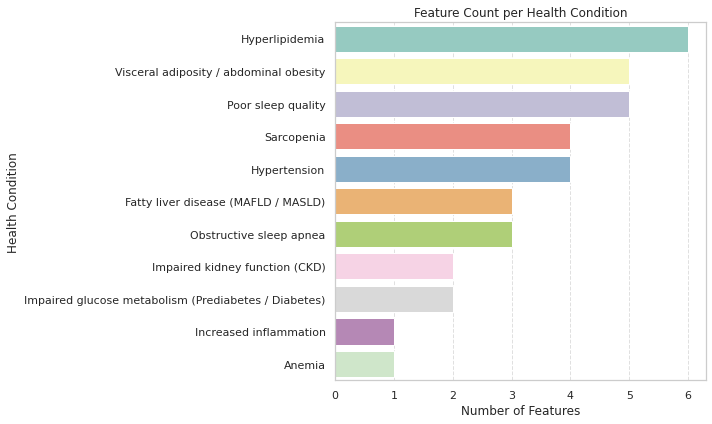

In [23]:
feature_condition_mapping = {
    'mean_hand_grip': 'Sarcopenia',
    'ALM': 'Sarcopenia',
    'ALMI': 'Sarcopenia',
    'ALM_BMI': 'Sarcopenia',
    'vat_fat_ratio': 'Visceral adiposity / abdominal obesity',
    'android/gynoid ratio': 'Visceral adiposity / abdominal obesity',
    'fat_mass_index': 'Visceral adiposity / abdominal obesity',
    'waist_hips_ratio': 'Visceral adiposity / abdominal obesity',
    'waist_height_ratio': 'Visceral adiposity / abdominal obesity',
    'sitting_systolic_bp_mean': 'Hypertension',
    'sitting_diastolic_bp_mean': 'Hypertension',
    'pulse_pressure': 'Hypertension',
    'mean_arterial_pressure': 'Hypertension',
    'liver_sound_speed_mps': 'Fatty liver disease (MAFLD / MASLD)',
    'AHI': 'Obstructive sleep apnea',
    'ODI': 'Obstructive sleep apnea',
    'RDI': 'Obstructive sleep apnea',
    '%DeepSleep': 'Poor sleep quality',
    'SleepLatency': 'Poor sleep quality',
    'NumberOfWakes': 'Poor sleep quality',
    'TotalSleepTime': 'Poor sleep quality',
    'TotalWakeTime': 'Poor sleep quality',
    'bt__egfr': 'Impaired kidney function (CKD)',
    'bt__urea': 'Impaired kidney function (CKD)',
    'bt__wbc': 'Increased inflammation',
    'bt__hba1c': 'Impaired glucose metabolism (Prediabetes / Diabetes)',
    'bt__glucose': 'Impaired glucose metabolism (Prediabetes / Diabetes)',
    'bt__alt_gpt': 'Fatty liver disease (MAFLD / MASLD)',
    'bt__ast_got': 'Fatty liver disease (MAFLD / MASLD)',
    'bt__mcv': 'Anemia',
    'bt__total_cholesterol': 'Hyperlipidemia',
    'bt__ldl_cholesterol': 'Hyperlipidemia',
    'bt__hdl_cholesterol': 'Hyperlipidemia',
    'bt__triglycerides': 'Hyperlipidemia',
    'bt__non_hdl_cholesterol': 'Hyperlipidemia',
    'triglyceride_to_hdl_ratio': 'Hyperlipidemia',
}

# Create DataFrame for plotting
df = pd.DataFrame.from_dict(feature_condition_mapping, orient='index', columns=['Condition'])
condition_counts = df['Condition'].value_counts().reset_index()
condition_counts.columns = ['Condition', 'Feature Count']

plt.figure(figsize=(10, 6))
sns.barplot(y='Condition', x='Feature Count', data=condition_counts, palette='Set3')
plt.title('Feature Count per Health Condition')
plt.xlabel('Number of Features')
plt.ylabel('Health Condition')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/feature_count_per_health_condition.png', dpi=300)

plt.show()

In [24]:
feature_condition_mapping = {
    # Visceral adiposity / abdominal obesity
    'vat_fat_ratio': 'Visceral adiposity / abdominal obesity',
    'android/gynoid ratio': 'Visceral adiposity / abdominal obesity',
    'fat_mass_index': 'Visceral adiposity / abdominal obesity',
    'waist_hips_ratio': 'Visceral adiposity / abdominal obesity',
    'waist_height_ratio': 'Visceral adiposity / abdominal obesity',
    'total_scan_vat_mass': 'Visceral adiposity / abdominal obesity',

    # Sarcopenia
    'mean_hand_grip': 'Sarcopenia',
    'ALM': 'Sarcopenia',
    'ALMI': 'Sarcopenia',
    'ALM_BMI': 'Sarcopenia',

    # Hypertension
    'sitting_systolic_bp_mean': 'Hypertension',
    'sitting_diastolic_bp_mean': 'Hypertension',
    'pulse_pressure': 'Hypertension',
    'mean_arterial_pressure': 'Hypertension',

    # Fatty liver disease (MAFLD / MASLD)
    'liver_sound_speed_mps': 'Fatty liver disease (MAFLD / MASLD)',

    # Obstructive sleep apnea
    'AHI': 'Obstructive sleep apnea',
    'ODI': 'Obstructive sleep apnea',
    'RDI': 'Obstructive sleep apnea',

    # Impaired kidney function (CKD)
    'bt__urea': 'Impaired kidney function (CKD)',
    'bt__uric_acid': 'Impaired kidney function (CKD)',

    # Increased inflammation
    'bt__wbc': 'Increased inflammation',

    # Impaired glucose metabolism (Prediabetes / Diabetes)
    'bt__glucose': 'Impaired glucose metabolism (Prediabetes / Diabetes)',

    # Anemia
    'bt__mcv': 'Anemia',
    'bt__hemoglobin': 'Anemia',

    # Hyperlipidemia
    'bt__total_cholesterol': 'Hyperlipidemia',
    'bt__triglycerides': 'Hyperlipidemia',
    'bt__non_hdl_cholesterol': 'Hyperlipidemia',
    'triglyceride_to_hdl_ratio': 'Hyperlipidemia',
    'bt__ldl_cholesterol': 'Hyperlipidemia',
    'bt__hdl_cholesterol': 'Hyperlipidemia',
}


# Convert to DataFrame (Condition -> Feature)
df = pd.DataFrame(
    [(cond, feat) for feat, cond in feature_condition_mapping.items()],
    columns=['Condition', 'Biomarkers']
).sort_values(by=['Condition', 'Biomarkers']).reset_index(drop=True)

# Format for Excel-style merged view (merge-like behavior)
df['Condition_display'] = df['Condition']
df.loc[df['Condition_display'].duplicated(), 'Condition_display'] = ''

# Reorder columns for final presentation
df_final = df[['Condition_display', 'Biomarkers']]
df_final.columns = ['Condition', 'Biomarkers']

# df_final.to_csv('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/feature_to_condition_mapping.csv')

In [25]:
bm_dexa_baseline = bm_dexa_baseline[['RegistrationCode', 'age', 'gender'] + dexa_targets]
ultrasound_baseline = ultrasound_baseline[['RegistrationCode', 'age', 'gender'] + ultrasound_targets]
sleep_baseline = sleep_baseline[['RegistrationCode', 'age', 'gender'] + sleep_targets]

In [26]:
bm_dexa_baseline['RegistrationCode'].nunique() == 11916

False

In [27]:
ultrasound_baseline['RegistrationCode'].nunique() == 8485

False

In [28]:
sleep_baseline['RegistrationCode'].nunique() == 6803

False

In [29]:
blood_baseline['RegistrationCode'].nunique() == 7483

False

In [30]:
gut_bacteria_df['RegistrationCode'].nunique() == 10952

False

#### Merge bacteria from diet_mb

In [31]:
diet_mb = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/segal_species/diet_mb.pkl")

with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/segal_species/my_lists.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
base_features, diet_features, microbial_features = loaded_lists

diet_features = [f for f in diet_features if f not in base_features]

drop_maybe = ['Richness', 'Shannon_diversity', 'modified_HACK_top17_score', 'GMWI2_score']

microbial_features = diet_mb.drop(columns=diet_features + drop_maybe).reset_index()
microbial_features = rename_microbiome_columns(microbial_features, mb_names)
microbial_features.head()

,RegistrationCode,age,sex,Duodenibacillus intestinigallinarum,Duodenibacillus intestinavium,Duodenibacillus massiliensis,Sutterella wadsworthensis,Sutterella sp937923675,Sutterella seckii_A,Sutterella sp934255515,...,Alistipes avistercoris,Alistipes dispar,Tidjanibacter inops,Oxalobacter aliiformigenes,Oxalobacter formigenes,Duodenibacillus sp900544335,Aphodousia faecalis,Parasutterella gallistercoris,Parasutterella excrementihominis,Mesosutterella multiformis
0,10K_1000942861,54.0,1.0,-4.0,-2.668341,-4.0,-4.000000,-3.139645,-1.72922,-4.0,...,-4.0,-2.963488,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.0,-4.000000,-4.00000
1,10K_1001201093,42.0,0.0,-4.0,-4.000000,-4.0,-2.963934,-4.000000,-4.00000,-4.0,...,-4.0,-4.000000,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.0,-4.000000,-4.00000
2,10K_1002254441,45.0,1.0,-4.0,-4.000000,-4.0,-4.000000,-4.000000,-4.00000,-4.0,...,-4.0,-4.000000,-4.000000,-3.228756,-4.0,-4.0,-4.0,-4.0,-2.383721,-4.00000
3,10K_1003113258,49.0,1.0,-4.0,-4.000000,-4.0,-2.651375,-4.000000,-4.00000,-4.0,...,-4.0,-3.561030,-4.000000,-3.622636,-4.0,-4.0,-4.0,-4.0,-3.806766,-4.00000
4,10K_1007330152,63.0,1.0,-4.0,-4.000000,-4.0,-4.000000,-4.000000,-4.00000,-4.0,...,-4.0,-4.000000,-2.490747,-4.000000,-4.0,-4.0,-4.0,-4.0,-1.937423,-2.98186


In [32]:
microbial_features

,RegistrationCode,age,sex,Duodenibacillus intestinigallinarum,Duodenibacillus intestinavium,Duodenibacillus massiliensis,Sutterella wadsworthensis,Sutterella sp937923675,Sutterella seckii_A,Sutterella sp934255515,...,Alistipes avistercoris,Alistipes dispar,Tidjanibacter inops,Oxalobacter aliiformigenes,Oxalobacter formigenes,Duodenibacillus sp900544335,Aphodousia faecalis,Parasutterella gallistercoris,Parasutterella excrementihominis,Mesosutterella multiformis
0,10K_1000942861,54.0,1.0,-4.000000,-2.668341,-4.000000,-4.000000,-3.139645,-1.72922,-4.0,...,-4.0,-2.963488,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.00000
1,10K_1001201093,42.0,0.0,-4.000000,-4.000000,-4.000000,-2.963934,-4.000000,-4.00000,-4.0,...,-4.0,-4.000000,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.00000
2,10K_1002254441,45.0,1.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.00000,-4.0,...,-4.0,-4.000000,-4.000000,-3.228756,-4.0,-4.0,-4.0,-4.000000,-2.383721,-4.00000
3,10K_1003113258,49.0,1.0,-4.000000,-4.000000,-4.000000,-2.651375,-4.000000,-4.00000,-4.0,...,-4.0,-3.561030,-4.000000,-3.622636,-4.0,-4.0,-4.0,-4.000000,-3.806766,-4.00000
4,10K_1007330152,63.0,1.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.00000,-4.0,...,-4.0,-4.000000,-2.490747,-4.000000,-4.0,-4.0,-4.0,-4.000000,-1.937423,-2.98186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10063,10K_9996884777,53.0,0.0,-4.000000,-4.000000,-4.000000,-2.700604,-4.000000,-4.00000,-4.0,...,-4.0,-3.536561,-3.195601,-3.350185,-4.0,-4.0,-4.0,-4.000000,-3.832439,-3.78628
10064,10K_9998420917,47.0,0.0,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.00000,-4.0,...,-4.0,-4.000000,-2.785597,-3.309716,-4.0,-4.0,-4.0,-2.564519,-2.439687,-4.00000
10065,10K_9998635752,60.0,1.0,-4.000000,-4.000000,-4.000000,-1.773531,-4.000000,-4.00000,-4.0,...,-4.0,-4.000000,-4.000000,-4.000000,-4.0,-4.0,-4.0,-4.000000,-2.996193,-4.00000
10066,10K_9999226141,41.0,1.0,-3.831234,-4.000000,-1.781562,-4.000000,-4.000000,-4.00000,-4.0,...,-4.0,-4.000000,-4.000000,-3.461156,-4.0,-4.0,-4.0,-4.000000,-4.000000,-4.00000


In [33]:
bm_dexa_baseline['RegistrationCode'].nunique() == 11916

False

In [34]:
ultrasound_baseline['RegistrationCode'].nunique() == 8485

False

In [35]:
sleep_baseline['RegistrationCode'].nunique() == 6803

False

In [36]:
blood_baseline['RegistrationCode'].nunique() == 7483

False

Merge all loaders into a master data frame

In [37]:
bm_dexa_baseline = bm_dexa_baseline.drop(columns=['age', 'gender'])
ultrasound_baseline = ultrasound_baseline.drop(columns=['age', 'gender'])
sleep_baseline = sleep_baseline.drop(columns=['age', 'gender'])
blood_baseline = blood_baseline.drop(columns=['age', 'gender'])

In [38]:
phenotypes_mb = (
    bm_dexa_baseline
    .merge(ultrasound_baseline, on=['RegistrationCode'], how='outer')
    .merge(sleep_baseline, on=['RegistrationCode'], how='outer')
    .merge(blood_baseline, on=['RegistrationCode'], how='outer')
)
phenotypes_mb

,RegistrationCode,vat_fat_ratio,android/gynoid ratio,fat_mass_index,waist_hips_ratio,waist_height_ratio,mean_hand_grip,ALM,ALMI,ALM_BMI,...,bt__glucose,bt__mcv,bt__hemoglobin,bt__uric_acid,bt__total_cholesterol,bt__triglycerides,bt__non_hdl_cholesterol,triglyceride_to_hdl_ratio,bt__ldl_cholesterol,bt__hdl_cholesterol
0,10K_1000942861,0.056535,1.309820,7.462508,0.925234,0.548476,131.349998,30.758968,9.440986,0.335065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10K_1001201093,0.021434,0.734188,6.268973,0.783505,0.447059,67.349998,17.051393,5.900136,0.287061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10K_1002033709,0.035183,1.193083,6.506630,0.879121,0.503145,57.500000,16.507440,6.529583,0.300135,...,NaN,89.7,13.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10K_1002087123,NaN,NaN,NaN,0.949580,0.665489,60.950001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10K_1002254441,0.055767,1.174556,6.893385,0.947368,0.505618,86.250000,21.831000,6.890229,0.295014,...,NaN,91.3,15.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11944,10K_6945742713,0.058928,1.612187,NaN,NaN,NaN,NaN,23.698987,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11945,10K_1640388450,0.007010,0.645227,NaN,NaN,NaN,NaN,14.644882,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11946,10K_1599538935,0.019868,0.917324,NaN,NaN,NaN,NaN,20.483267,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11947,10K_3398498395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# 2. Merge — keep age/sex from microbial_features
phenotypes_mb = pd.merge(
    phenotypes_mb,
    microbial_features,
    on='RegistrationCode',
    how='inner'
)

cols = ['RegistrationCode', 'age', 'sex'] + [col for col in phenotypes_mb.columns if col not in ['RegistrationCode', 'age', 'sex']]
phenotypes_mb = phenotypes_mb[cols]

phenotypes_mb

,RegistrationCode,age,sex,vat_fat_ratio,android/gynoid ratio,fat_mass_index,waist_hips_ratio,waist_height_ratio,mean_hand_grip,ALM,...,Alistipes avistercoris,Alistipes dispar,Tidjanibacter inops,Oxalobacter aliiformigenes,Oxalobacter formigenes,Duodenibacillus sp900544335,Aphodousia faecalis,Parasutterella gallistercoris,Parasutterella excrementihominis,Mesosutterella multiformis
0,10K_1000942861,54.0,1.0,0.056535,1.309820,7.462508,0.925234,0.548476,131.349998,30.758968,...,-4.0,-2.963488,-4.000000,-4.000000,-4.0,-4.0,-4.000000,-4.0,-4.000000,-4.00000
1,10K_1001201093,42.0,0.0,0.021434,0.734188,6.268973,0.783505,0.447059,67.349998,17.051393,...,-4.0,-4.000000,-4.000000,-4.000000,-4.0,-4.0,-4.000000,-4.0,-4.000000,-4.00000
2,10K_1002254441,45.0,1.0,0.055767,1.174556,6.893385,0.947368,0.505618,86.250000,21.831000,...,-4.0,-4.000000,-4.000000,-3.228756,-4.0,-4.0,-4.000000,-4.0,-2.383721,-4.00000
3,10K_1003113258,49.0,1.0,NaN,NaN,NaN,0.481481,0.268041,102.850002,NaN,...,-4.0,-3.561030,-4.000000,-3.622636,-4.0,-4.0,-4.000000,-4.0,-3.806766,-4.00000
4,10K_1007330152,63.0,1.0,0.095797,1.595805,14.307040,1.035714,0.713846,97.450001,25.144313,...,-4.0,-4.000000,-2.490747,-4.000000,-4.0,-4.0,-4.000000,-4.0,-1.937423,-2.98186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10063,10K_6595065879,53.0,0.0,0.004003,0.641055,NaN,NaN,NaN,NaN,12.496091,...,-4.0,-3.620901,-4.000000,-4.000000,-4.0,-4.0,-4.000000,-4.0,-3.705436,-4.00000
10064,10K_1439720299,51.0,1.0,0.041723,1.154418,NaN,NaN,NaN,NaN,22.371791,...,-4.0,-2.715262,-3.165483,-4.000000,-4.0,-4.0,-4.000000,-4.0,-3.425893,-4.00000
10065,10K_4637431621,57.0,0.0,0.037967,0.913265,NaN,NaN,NaN,NaN,15.591000,...,-4.0,-4.000000,-4.000000,-4.000000,-4.0,-4.0,-4.000000,-4.0,-4.000000,-4.00000
10066,10K_9999226141,41.0,1.0,0.052698,1.429954,NaN,NaN,NaN,NaN,24.904157,...,-4.0,-4.000000,-4.000000,-3.461156,-4.0,-4.0,-4.000000,-4.0,-4.000000,-4.00000


Microbial Feature Standardization

In [40]:
# Drop samples with missing demographic values
phenotypes_mb = phenotypes_mb.dropna(subset=['age', 'sex'])

# Select microbial features only
exclude = {'age', 'sex', 'RegistrationCode'}
features_to_standardize = [f for f in microbial_features.columns if f not in exclude]
age_feature = ['age']

# Standardize selected features

home_path = '/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/'
SPECIES = 'segal_species' # 'segal_species' or 'segal_species'

with open(home_path + f'data/{SPECIES}/mb_scaler.pkl', 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)
with open(home_path + f'data/{SPECIES}/age_scaler.pkl', 'rb') as scaler_file:
        age_scaler = pickle.load(scaler_file)

phenotypes_mb[features_to_standardize] = scaler.transform(
    phenotypes_mb[features_to_standardize]
)
phenotypes_mb[age_feature] = age_scaler.transform(
    phenotypes_mb[age_feature]
)

# Display standardized features
phenotypes_mb[features_to_standardize]

/home/barakdan/.local/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/barakdan/.local/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/home/barakdan/.local/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,Duodenibacillus intestinigallinarum,Duodenibacillus intestinavium,Duodenibacillus massiliensis,Sutterella wadsworthensis,Sutterella sp937923675,Sutterella seckii_A,Sutterella sp934255515,Sutterella wadsworthensis_A,Akkermansia muciniphila_A,Akkermansia muciniphila,...,Alistipes avistercoris,Alistipes dispar,Tidjanibacter inops,Oxalobacter aliiformigenes,Oxalobacter formigenes,Duodenibacillus sp900544335,Aphodousia faecalis,Parasutterella gallistercoris,Parasutterella excrementihominis,Mesosutterella multiformis
0,-0.255028,3.119546,-0.486988,-1.006548,3.405601,4.628645,-0.446093,-0.641526,-0.367939,0.413974,...,-0.241304,1.002123,-0.557867,-0.796541,-0.310977,-0.245626,-0.237297,-0.273837,-0.791682,-0.412735
1,-0.255028,-0.255656,-0.486988,0.172252,-0.318449,-0.359778,-0.446093,1.863480,-0.367939,1.665946,...,-0.241304,-0.712811,-0.557867,-0.796541,-0.310977,-0.245626,-0.237297,-0.273837,-0.791682,-0.412735
2,-0.255028,-0.255656,-0.486988,-1.006548,-0.318449,-0.359778,-0.446093,-0.641526,-0.367939,1.517669,...,-0.241304,-0.712811,-0.557867,0.992833,-0.310977,-0.245626,-0.237297,-0.273837,1.692209,-0.412735
3,-0.255028,-0.255656,-0.486988,0.527871,-0.318449,-0.359778,-0.446093,-0.641526,-0.367939,1.499602,...,-0.241304,0.013476,-0.557867,0.078987,-0.310977,-0.245626,-0.237297,-0.273837,-0.494721,-0.412735
4,-0.255028,-0.255656,-0.486988,-1.006548,-0.318449,-0.359778,-0.446093,-0.641526,2.247506,0.531570,...,-0.241304,-0.712811,1.726774,-0.796541,-0.310977,-0.245626,-0.237297,-0.273837,2.378079,1.526409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10063,-0.255028,-0.255656,-0.486988,-1.006548,-0.318449,-0.359778,-0.446093,1.674841,-0.367939,-0.939089,...,-0.241304,-0.085583,-0.557867,-0.796541,-0.310977,-0.245626,-0.237297,-0.273837,-0.338997,-0.412735
10064,-0.255028,-0.255656,-0.486988,1.076569,-0.318449,-0.359778,-0.446093,2.026381,-0.367939,-0.939089,...,-0.241304,1.412819,0.705388,-0.796541,-0.310977,-0.245626,-0.237297,-0.273837,0.090603,-0.412735
10065,-0.255028,-0.255656,0.977886,-0.894222,4.536469,2.439082,1.940238,0.396866,-0.367939,-0.939089,...,-0.241304,-0.712811,-0.557867,-0.796541,-0.310977,-0.245626,-0.237297,-0.273837,-0.791682,-0.412735
10066,0.172215,-0.255656,2.387944,-1.006548,-0.318449,-0.359778,-0.446093,-0.641526,-0.367939,-0.939089,...,-0.241304,-0.712811,-0.557867,0.453639,-0.310977,-0.245626,-0.237297,-0.273837,-0.791682,-0.412735


Replace outliers with NA

In [41]:
def replace_outliers_with_nan_iqr(df, target_cols, k=1.5):
    df_copy = df.copy()
    for col in target_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        # Replace outliers with NaN
        df_copy.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan
    return df_copy

target_cols = sum(target_phenotypes, [])
phenotypes_mb = replace_outliers_with_nan_iqr(phenotypes_mb, target_cols)

phenotypes_mb

,RegistrationCode,age,sex,vat_fat_ratio,android/gynoid ratio,fat_mass_index,waist_hips_ratio,waist_height_ratio,mean_hand_grip,ALM,...,Alistipes avistercoris,Alistipes dispar,Tidjanibacter inops,Oxalobacter aliiformigenes,Oxalobacter formigenes,Duodenibacillus sp900544335,Aphodousia faecalis,Parasutterella gallistercoris,Parasutterella excrementihominis,Mesosutterella multiformis
0,10K_1000942861,0.375867,1.0,0.056535,1.309820,7.462508,0.925234,0.548476,131.349998,30.758968,...,-0.241304,1.002123,-0.557867,-0.796541,-0.310977,-0.245626,-0.237297,-0.273837,-0.791682,-0.412735
1,10K_1001201093,-1.189224,0.0,0.021434,0.734188,6.268973,0.783505,0.447059,67.349998,17.051393,...,-0.241304,-0.712811,-0.557867,-0.796541,-0.310977,-0.245626,-0.237297,-0.273837,-0.791682,-0.412735
2,10K_1002254441,-0.797952,1.0,0.055767,1.174556,6.893385,0.947368,0.505618,86.250000,21.831000,...,-0.241304,-0.712811,-0.557867,0.992833,-0.310977,-0.245626,-0.237297,-0.273837,1.692209,-0.412735
3,10K_1003113258,-0.276254,1.0,NaN,NaN,NaN,NaN,NaN,102.850002,NaN,...,-0.241304,0.013476,-0.557867,0.078987,-0.310977,-0.245626,-0.237297,-0.273837,-0.494721,-0.412735
4,10K_1007330152,1.549686,1.0,NaN,1.595805,14.307040,1.035714,NaN,97.450001,25.144313,...,-0.241304,-0.712811,1.726774,-0.796541,-0.310977,-0.245626,-0.237297,-0.273837,2.378079,1.526409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10063,10K_6595065879,0.245443,0.0,0.004003,0.641055,NaN,NaN,NaN,NaN,12.496091,...,-0.241304,-0.085583,-0.557867,-0.796541,-0.310977,-0.245626,-0.237297,-0.273837,-0.338997,-0.412735
10064,10K_1439720299,-0.015406,1.0,0.041723,1.154418,NaN,NaN,NaN,NaN,22.371791,...,-0.241304,1.412819,0.705388,-0.796541,-0.310977,-0.245626,-0.237297,-0.273837,0.090603,-0.412735
10065,10K_4637431621,0.767140,0.0,0.037967,0.913265,NaN,NaN,NaN,NaN,15.591000,...,-0.241304,-0.712811,-0.557867,-0.796541,-0.310977,-0.245626,-0.237297,-0.273837,-0.791682,-0.412735
10066,10K_9999226141,-1.319649,1.0,0.052698,1.429954,NaN,NaN,NaN,NaN,24.904157,...,-0.241304,-0.712811,-0.557867,0.453639,-0.310977,-0.245626,-0.237297,-0.273837,-0.791682,-0.412735


In [59]:
mb_names[mb_names['species_new'] == 'Faecalibacterium longum']

,Unnamed: 0,kingdom,phylum,class,order,family,genus,species,sBin,gBin,...,sSGB,gSGB,fSGB,kingdom_new,phylum_new,class_new,order_new,family_new,genus_new,species_new
fBin__534|gBin__2021|sBin__3065,Rep_3065,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,Faecalibacterium prausnitzii_G,3065.0,2021.0,...,15316,9740,3058,Bacteria,Bacillota_A,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,Faecalibacterium longum
fBin__534|gBin__2021|sBin__3066,Rep_3066,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,Faecalibacterium prausnitzii_G,3066.0,2021.0,...,unknown,9740,3058,Bacteria,Bacillota_A,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,Faecalibacterium longum


In [120]:
"Alistipescatomonas sp900066785" in phenotypes_mb.columns

False

In [121]:
"Alistipescatomonas sp900066785" in microbial_features.columns

False

<AxesSubplot:>

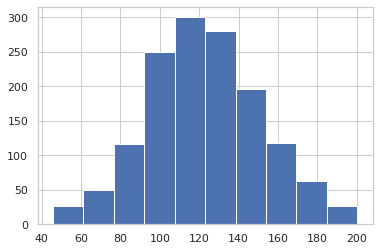

In [41]:
phenotypes_mb['bt__ldl_cholesterol'].hist()

Save the data frame

In [44]:
phenotypes_mb.to_pickle(path='/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/phenotypes_mb.pkl')

In [45]:
microbial_features = [col for col in phenotypes_mb.columns if col not in sum(target_phenotypes, []) + ['RegistrationCode']]

with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/microbial_features.pkl', 'wb') as f:
    pickle.dump(microbial_features, f)

#### Merge diet to predict phenotypes

In [44]:
diet_mb = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/segal_species/diet_mb.pkl")

with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/segal_species/my_lists.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
base_features, diet_features, microbial_features = loaded_lists

diet_features = diet_mb[diet_features].reset_index()
diet_features = diet_features.drop(columns=['Energy / BMR'])
diet_features

,RegistrationCode,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,...,Soupsandsauces,Spicesandherbs,Vegetables,bakedgoods,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets,age,sex
0,10K_1000942861,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016416,0.000000,...,0.000000,0.000000,0.045932,0.000000,0.000000,0.006411,0.000000,0.178383,54.0,1.0
1,10K_1001201093,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.013895,0.000000,...,0.000000,0.000000,0.089702,0.000000,0.022094,0.036706,0.029071,0.296512,42.0,0.0
2,10K_1002254441,0.0,0.0,0.0,0.0,0.0,0.081238,0.0,0.000000,0.000000,...,0.018351,0.000000,0.209010,0.000000,0.000000,0.000656,0.000000,0.002445,45.0,1.0
3,10K_1003113258,0.0,0.0,0.0,0.0,0.0,0.002048,0.0,0.008929,0.000000,...,0.000000,0.000000,0.045934,0.004363,0.010416,0.046349,0.000000,0.101867,49.0,1.0
4,10K_1007330152,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.007387,0.000000,0.041334,0.089115,0.032551,0.048597,0.000000,0.214221,63.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,10K_9996884777,0.0,0.0,0.0,0.0,0.0,0.002401,0.0,0.000000,0.000000,...,0.001595,0.000000,0.230306,0.011906,0.014559,0.000000,0.000000,0.143853,53.0,0.0
10060,10K_9998420917,0.0,0.0,0.0,0.0,0.0,0.019995,0.0,0.018783,0.000000,...,0.000319,0.000568,0.120191,0.000000,0.000000,0.024279,0.000000,0.061852,47.0,0.0
10061,10K_9998635752,0.0,0.0,0.0,0.0,0.0,0.001607,0.0,0.011305,0.000000,...,0.025801,0.000000,0.093734,0.000000,0.000000,0.061951,0.000000,0.024665,60.0,1.0
10062,10K_9999226141,0.0,0.0,0.0,0.0,0.0,0.003292,0.0,0.000000,0.000000,...,0.038214,0.000000,0.014000,0.026904,0.008415,0.004299,0.000000,0.152223,41.0,1.0


In [45]:
phenotypes_diet = (
    bm_dexa_baseline
    .merge(ultrasound_baseline, on=['RegistrationCode'], how='outer')
    .merge(sleep_baseline, on=['RegistrationCode'], how='outer')
    .merge(blood_baseline, on=['RegistrationCode'], how='outer')
)

# 2. Merge — keep age/sex from diet_features
phenotypes_diet  = pd.merge(
    phenotypes_diet ,
    diet_features,
    on='RegistrationCode',
    how='inner'
)

cols = ['RegistrationCode', 'age', 'sex'] + [col for col in phenotypes_diet.columns if col not in ['RegistrationCode', 'age', 'sex']]
phenotypes_diet = phenotypes_diet[cols]


# Drop samples with missing demographic values
phenotypes_diet = phenotypes_diet.dropna(subset=['age', 'sex'])

# Select microbial features only
exclude = {'age', 'sex', 'RegistrationCode'}
features_to_standardize = [f for f in diet_features.columns if f not in exclude]

phenotypes_diet

# Standardize selected features
scaler = StandardScaler()
phenotypes_diet[features_to_standardize] = scaler.fit_transform(
    phenotypes_diet[features_to_standardize]
)

# Display standardized features
phenotypes_diet[features_to_standardize]


phenotypes_diet

,RegistrationCode,age,sex,vat_fat_ratio,android/gynoid ratio,fat_mass_index,waist_hips_ratio,waist_height_ratio,mean_hand_grip,ALM,...,Pulsesandproducts,Snacks,Soupsandsauces,Spicesandherbs,Vegetables,bakedgoods,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets
0,10K_1000942861,54.0,1.0,0.056535,1.309820,7.462508,0.925234,0.548476,131.349998,30.758968,...,0.432763,-0.444773,-0.543312,-0.229866,-0.636329,-0.404073,-0.466572,-0.867208,-0.312320,0.860179
1,10K_1001201093,42.0,0.0,0.021434,0.734188,6.268973,0.783505,0.447059,67.349998,17.051393,...,-0.638558,-0.444773,-0.543312,-0.229866,0.266226,-0.404073,0.815181,-0.186711,1.931048,2.394859
2,10K_1002254441,45.0,1.0,0.055767,1.174556,6.893385,0.947368,0.505618,86.250000,21.831000,...,-0.306303,-0.444773,1.402833,-0.229866,2.726452,-0.404073,-0.466572,-0.996471,-0.312320,-1.425531
3,10K_1003113258,49.0,1.0,NaN,NaN,NaN,0.481481,0.268041,102.850002,NaN,...,0.126154,-0.444773,-0.543312,-0.229866,-0.636306,-0.186881,0.137704,0.029893,-0.312320,-0.133889
4,10K_1007330152,63.0,1.0,0.095797,1.595805,14.307040,1.035714,0.713846,97.450001,25.144313,...,-0.053120,-0.444773,0.240141,-0.229866,-0.731155,4.032429,1.421811,0.080393,-0.312320,1.325771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,10K_6595065879,53.0,0.0,0.004003,0.641055,NaN,NaN,NaN,NaN,12.496091,...,-0.559144,0.135636,-0.543312,-0.229866,0.321207,-0.291718,-0.466572,-0.404151,-0.084076,-0.852395
10060,10K_1439720299,51.0,1.0,0.041723,1.154418,NaN,NaN,NaN,NaN,22.371791,...,-0.389521,0.061404,-0.388908,0.307236,0.684556,-0.404073,-0.310785,0.971562,0.120581,-0.458192
10061,10K_4637431621,57.0,0.0,0.037967,0.913265,NaN,NaN,NaN,NaN,15.591000,...,-0.514404,-0.444773,-0.531171,-0.229866,0.205767,-0.404073,-0.466572,-0.749133,-0.312320,-0.934949
10062,10K_9999226141,41.0,1.0,0.052698,1.429954,NaN,NaN,NaN,NaN,24.904157,...,-0.391235,-0.444773,3.509369,-0.229866,-1.294803,0.935314,0.021594,-0.914643,-0.312320,0.520322


In [ ]:
phenotypes_diet.to_pickle(path='/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/phenotypes_diet.pkl')

#### Merge diet to the microbiome predicted values of the phenotypes

In [ ]:
predicted_phenotypes_diet = pd.read_pickle('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/phenotypes_final_df.pkl')
predicted_phenotypes_diet

,RegistrationCode,age,gender,vat_fat_ratio_prediction,android/gynoid ratio_prediction,fat_mass_index_prediction,waist_hips_ratio_prediction,waist_height_ratio_prediction,mean_hand_grip_prediction,ALM_prediction,...,bt__glucose_prediction,bt__mcv_prediction,bt__hemoglobin_prediction,bt__uric_acid_prediction,bt__total_cholesterol_prediction,bt__triglycerides_prediction,bt__non_hdl_cholesterol_prediction,triglyceride_to_hdl_ratio_prediction,bt__ldl_cholesterol_prediction,bt__hdl_cholesterol_prediction
0,10K_1000942861,54.0,1.0,0.048491,1.235221,7.367739,0.920057,0.538719,98.003548,26.020292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10K_1001201093,42.0,0.0,0.019539,0.891812,9.199122,0.803540,0.500153,59.693596,17.223175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10K_1002254441,45.0,1.0,0.036797,1.081931,5.948738,0.877920,0.500414,102.607796,25.177296,...,NaN,89.649040,14.804728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10K_1007400622,64.0,0.0,0.030808,1.028680,10.083160,0.861327,0.545923,55.590599,18.465477,...,NaN,88.986076,13.505773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10K_1007474664,47.0,0.0,0.017889,0.859200,8.521791,0.812507,0.490787,59.604469,16.218229,...,NaN,89.697121,13.033100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10037,10K_8238970040,66.0,1.0,NaN,NaN,NaN,NaN,NaN,89.105354,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10038,10K_8277726318,59.0,1.0,NaN,NaN,NaN,NaN,NaN,95.902344,NaN,...,93.508835,88.820709,15.021180,6.304830,NaN,NaN,NaN,NaN,NaN,NaN
10039,10K_8411492520,64.0,1.0,NaN,NaN,NaN,NaN,NaN,88.246620,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10040,10K_9083132159,50.0,1.0,NaN,NaN,NaN,NaN,NaN,103.557098,NaN,...,91.550941,88.799065,14.982905,5.878156,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
predicted_phenotypes_diet = (
    predicted_phenotypes_diet.merge(diet_features, on=['RegistrationCode', 'age', 'sex'], how='outer')
)
predicted_phenotypes_diet

KeyError: 'sex'

In [ ]:
predicted_phenotypes_diet.to_pickle(path='/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/predicted_phenotypes_diet.pkl')